## Введение в анализ данных, ИАД-1

## НИУ ВШЭ, 2018-19 учебный год

### Домашнее задание №2

Задание выполнил(а): _Билева Анна_

### Общая информация

__Дата выдачи:__ 25.02.2019

__Дедлайн:__ 23:59 5.03.2019

### О задании

В данном домашнем задании вы реализуете линейную регрессию своими руками и сравните её с версией в scikit-learn.

### Оценивание и штрафы

За сдачу задания позже срока на итоговую оценку за задание накладывается штраф в размере 1 балл в день, но получить отрицательную оценку нельзя.

__Внимание!__ Домашнее задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов.

### Формат сдачи

__Стирать условия нельзя!__

Загрузка файлов с решениями происходит в системе [Anytask](https://anytask.org/).

Формат названия файла: homework_02_Фамилия_Имя.ipynb

## Часть 1. Обыкновенная линейная регрессия

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='darkgrid')
from sklearn.base import BaseEstimator
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import normalize
%matplotlib inline
np.random.seed(seed=42)

### 1 (4 балла). 
На семинаре мы начали реализовывать класс линейной регрессии; теперь необходимо его закончить. 

In [2]:
class LinReg(BaseEstimator):
    def __init__(self, step_size=0.1, num_steps=20, eps=1e-6):
        self.w = None # веса
        self.step_size = step_size
        self.num_steps = num_steps
        self.eps = eps
    
    def __calc_grad(self, X_train, y_train):
        return 2 * np.dot(np.transpose(X_train), (np.dot(X_train, self.w) - y_train))
    
    def fit(self, X_train, y_train):
        self.w = np.random.rand(X_train.shape[1])
        for step in range(self.num_steps):
            w_next = self.w - self.step_size * self.__calc_grad(X_train, y_train)
            if np.linalg.norm(w_next - self.w) < self.eps:
                break
            self.w = w_next
        return self
        
    def predict(self, X_test):
        return np.dot(X_test, self.w)

### 2 (3 балла). 
Проверим корректность работы класса на датасете Boston Housing. 
* Загрузите его из sklearn
* Проведите предобработку данных(нормализация вещественных признаков, one-hot encoding категориальных)
* Разделите на обучение и контроль в соотношении 80:20 с random_seed 42 (самый популярный в прошлом задании)
* Обучите собственную реализацию регрессии и сравните по метрикам MAE и RMSE с LinearRegression из sklearn.

In [3]:
boston_data = load_boston()
df = pd.DataFrame(boston_data.data)
df.head() # это данные без целевого признака

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Категориальных признаков нет, только вещественные; отнормируем их.

In [4]:
df = pd.DataFrame(normalize(df))
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.000013,0.035997,0.004620,0.0,0.001076,0.013149,0.130388,0.008179,0.002000,0.591945,0.030597,0.793727,0.009959
1,0.000058,0.000000,0.014977,0.0,0.000994,0.013602,0.167140,0.010522,0.004237,0.512648,0.037707,0.840785,0.019362
2,0.000059,0.000000,0.015174,0.0,0.001007,0.015421,0.131140,0.010661,0.004293,0.519409,0.038204,0.843138,0.008650
3,0.000071,0.000000,0.004785,0.0,0.001005,0.015360,0.100527,0.013306,0.006585,0.487268,0.041045,0.866174,0.006453
4,0.000151,0.000000,0.004755,0.0,0.000999,0.015587,0.118209,0.013222,0.006543,0.484177,0.040784,0.865631,0.011625


Разделим на обучающую и тестовую выборки:

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df, boston_data.target, test_size=0.2, random_state=42)

Обучим нашу линейную регрессию и регрессию из sklearn:

In [6]:
lr1 = LinReg(num_steps=10000, step_size=0.002, eps=1e-8)
lr1.fit(X_train, y_train)
y1_pred = lr1.predict(X_test)
print('LinReg')
print('MAE:', mean_absolute_error(y_test, y1_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y1_pred)))
lr2 = LinearRegression()
lr2.fit(X_train, y_train)
y2_pred = lr2.predict(X_test)
print('LinearRegression')
print('MAE:', mean_absolute_error(y_test, y2_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y2_pred)))

LinReg
MAE: 4.2083329380419885
RMSE: 5.814768439114835
LinearRegression
MAE: 3.061883108828705
RMSE: 4.809944096526614


#### 3 (3 балла). 
Линейная регрессия зачастую легко переобучается - модель необходимо штрафовать за величину весов; для этого применяют L1 и L2 регуляризацию: добавление нормы весов к функции потерь. В случае L2-регулязации функционал будет выглядеть как

$$ L = (Xw - y)^T(Xw - y) + \lambda||w||_2 $$.

Параметр $\lambda$ подбирается на отложенной выборке или по кросс-валидации.

* Реализуйте обучение линейной регрессии с L2-регуляризацией
* Найдите оптимальный с точки зрения метрики MAE коэффициент $\lambda$ (по кросс-валидации)
* Постройте график зависимости метрики на тестовой выборке от $\lambda$ (__подпишите оси__)
* Сравните результаты с Ridge регрессией из sklearn (аналогично пункту 2).

Градиент функционала будет иметь вид:
$$ \triangledown L(w)= 2X^T(Xw-y) + 2\lambda w$$
Реализуем линейную регрессию с L2-регуляризацией.

In [7]:
class RegL2(BaseEstimator):
    def __init__(self, step_size=0.002, num_steps=10000, eps=1e-8, lambda_coef=0.0001):
        self.w = None # веса
        self.step_size = step_size
        self.num_steps = num_steps
        self.eps = eps
        self.lambda_coef = lambda_coef
    
    def __calc_grad(self, X_train, y_train):
        return 2 * np.dot(np.transpose(X_train), (np.dot(X_train, self.w) - y_train)) + 2 * self.lambda_coef * self.w
    
    def fit(self, X_train, y_train):
        self.w = np.random.rand(X_train.shape[1])
        for step in range(self.num_steps):
            w_next = self.w - self.step_size * self.__calc_grad(X_train, y_train)
            if np.linalg.norm(w_next - self.w) < self.eps:
                break
            self.w = w_next
        return self
        
    def predict(self, X_test):
        return np.dot(X_test, self.w)

Найдём оптимальный коэффициент $\lambda$ с точки зрения MAE. 

In [8]:
lambdas = np.arange(0.0001, 0.001, 0.0001)
optimal_lambda = 0
min_score = 1e8
mae_values = []
for lambda_coef in lambdas:
    lr_reg = RegL2(lambda_coef=lambda_coef)
    cv_results = cross_validate(lr_reg, X_train, y_train, scoring='neg_mean_absolute_error', cv=3, 
                                return_train_score=False)
    score = np.abs((cv_results['test_score'][0] + cv_results['test_score'][1] +
                              cv_results['test_score'][2]) / 3)
    mae_values.append(score)
    if score < min_score: 
        optimal_lambda = lambda_coef
        min_score = score
print(optimal_lambda, min_score)

0.0001 4.797948388133083


Построим график зависимости MAE от $\lambda$.

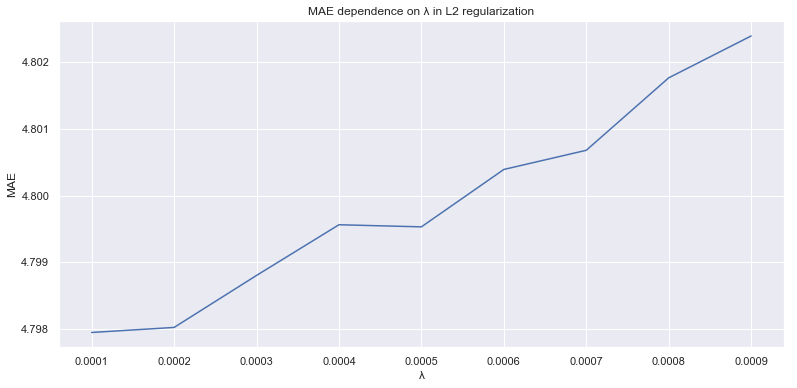

In [9]:
plt.figure(figsize=(13, 6))
plt.plot(lambdas, mae_values)
plt.title('MAE dependence on λ in L2 regularization')
plt.xlabel('λ')
plt.ylabel('MAE')
plt.show()

Судя по всему, модель не переобучается и в регуляризации не нуждается, т.к. чем ближе $\lambda$ к нулю, тем MAE меньше. Обучим и сравним нашу линейную регрессию и Ridge из sklearn.

In [10]:
lr1 = RegL2()
lr1.fit(X_train, y_train)
y1_pred = lr1.predict(X_test)
print('RegL2:')
print('MAE:', mean_absolute_error(y_test, y1_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y1_pred)))
lr2 = Ridge(alpha=0.0001)
lr2.fit(X_train, y_train)
y2_pred = lr2.predict(X_test)
print('Ridge:')
print('MAE:', mean_absolute_error(y_test, y2_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y2_pred)))

RegL2:
MAE: 4.207951907818764
RMSE: 5.815188382415841
Ridge:
MAE: 3.0011297523504274
RMSE: 4.74714557010129


### 4 (Бонус, 4 балла). 
* Реализуйте обучение линейной регрессии с L1-регуляризацией (класс RegL1)
* Проведите сравнения аналогично пункту 3 (но с Lasso вместо Ridge).

У нормы $L_1$ нет градиента, так как модуль не является дифференцируемой функцией. Тем не менее, можно обобщить понятие градиента для выпуклых функций (которой и является модуль) и ввести понятие субградиента, который можно посчитать в любой точке. Субградиентом модуля является функция sgn(x), принимающая значение -1 при x<0, 0 при x=0, 1 при x>0. Таким образом, субградиент функционала $L_1$ будет иметь вид:
$$\triangledown L_1 (w) = 2X^T(Xw-y) + \lambda sgn(w)$$
Под sgn(w) понимается sgn($\sum_i w_i$).

In [11]:
class RegL1(BaseEstimator):
    def __init__(self, step_size=0.002, num_steps=10000, eps=1e-8, lambda_coef=15):
        self.w = None # веса
        self.step_size = step_size
        self.num_steps = num_steps
        self.eps = eps
        self.lambda_coef = lambda_coef
        
    def __sgn(self):
        if np.sum(self.w) > 0:
            return 1
        elif np.sum(self.w) == 0:
            return 0
        else:
            return -1
    
    def __calc_grad(self, X_train, y_train):
        return 2 * np.dot(np.transpose(X_train), (np.dot(X_train, self.w) - y_train)) + self.lambda_coef * self.__sgn()
    
    def fit(self, X_train, y_train):
        self.w = np.random.rand(X_train.shape[1])
        for step in range(self.num_steps):
            w_next = self.w - self.step_size * self.__calc_grad(X_train, y_train)
            if np.linalg.norm(w_next - self.w) < self.eps:
                break
            self.w = w_next
        return self
        
    def predict(self, X_test):
        return np.dot(X_test, self.w)

Повторим все те же действия, что и в прошлом пункте.

In [12]:
lambdas = [1, 5, 10, 15, 20]
optimal_lambda = 0
min_score = 1e8
mae_values = []
for lambda_coef in lambdas:
    lr_reg = RegL2(lambda_coef=lambda_coef)
    cv_results = cross_validate(lr_reg, X_train, y_train, scoring='neg_mean_absolute_error', cv=3, 
                                return_train_score=False)
    score = np.abs((cv_results['test_score'][0] + cv_results['test_score'][1] +
                              cv_results['test_score'][2]) / 3)
    mae_values.append(score)
    if score < min_score: 
        optimal_lambda = lambda_coef
        min_score = score
print(optimal_lambda, min_score)

15 5.838279694812987


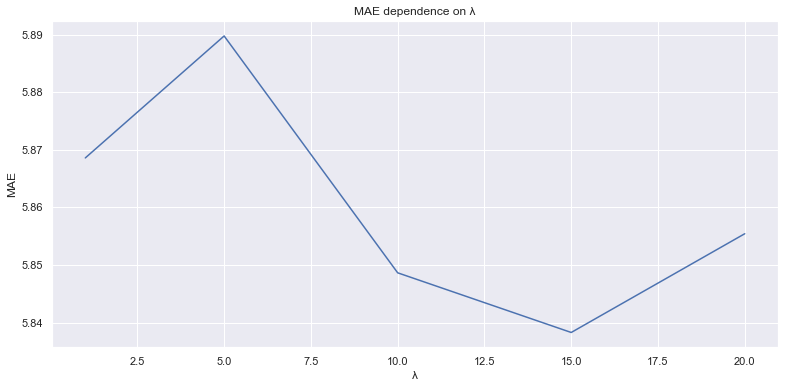

In [13]:
plt.figure(figsize=(13, 6))
plt.plot(lambdas, mae_values)
plt.title('MAE dependence on λ')
plt.xlabel('λ')
plt.ylabel('MAE')
plt.show()

По графику видно, что зависимость MAE от коэффициента сложнее, чем в предыдущий раз. Тем не менее, разброс в значениях (особенно в точках-минимумах) довольно небольшой, и можно сказать, что значение $\lambda$ мы выбрали $\pm$оптимальное. Теперь сравним работу RegL1 и Lasso:

In [14]:
lr1 = RegL1()
lr1.fit(X_train, y_train)
y1_pred = lr1.predict(X_test)
print('RegL1:')
print('MAE:', mean_absolute_error(y_test, y1_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y1_pred)))
lr2 = Lasso(alpha=15)
lr2.fit(X_train, y_train)
y2_pred = lr2.predict(X_test)
print('Lasso:')
print('MAE:', mean_absolute_error(y_test, y2_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y2_pred)))

RegL1:
MAE: 4.053628460770161
RMSE: 5.684928017762736
Lasso:
MAE: 6.255843525529023
RMSE: 8.662876564628665


### 5 (Бонус, 2 балла). 
Исследуйте для реализации регрессии с L2-регуляризацией зависимость качества на тестовой выборке (с графиками) от:
* Длины шага
* Количества шагов спуска
* Константы epsilon.

Начнем с длины шага.

In [15]:
step_sizes = np.arange(0.0005, 0.004, 0.0003)
optimal_size = 0
min_score = 1e8
mae_values = []
for size in step_sizes:
    lr_reg = RegL2(step_size=size)
    cv_results = cross_validate(lr_reg, X_train, y_train, scoring='neg_mean_absolute_error', cv=3, 
                                return_train_score=False)
    score = np.abs((cv_results['test_score'][0] + cv_results['test_score'][1] +
                              cv_results['test_score'][2]) / 3)
    mae_values.append(score)
    if score < min_score: 
        optimal_size = size
        min_score = score
print(optimal_size, min_score)

0.003799999999999999 4.689452969830968


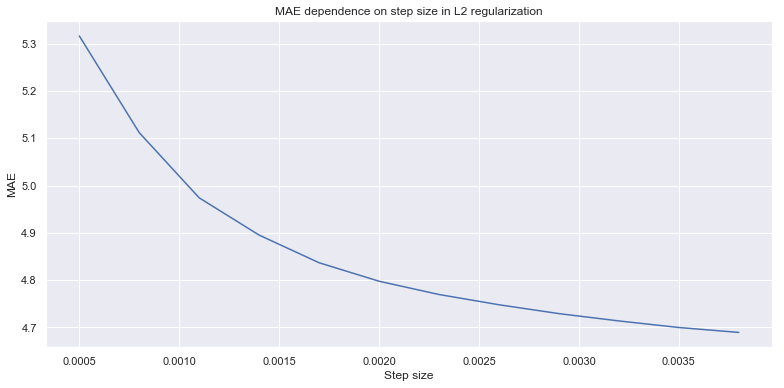

In [16]:
plt.figure(figsize=(13, 6))
plt.plot(step_sizes, mae_values)
plt.title('MAE dependence on step size in L2 regularization')
plt.xlabel('Step size')
plt.ylabel('MAE')
plt.show()

Для step_size = 0.004 MAE становится уже очень большим:

In [17]:
lr_reg = RegL2(step_size=0.004)
cv_results = cross_validate(lr_reg, X_train, y_train, scoring='neg_mean_absolute_error', cv=3, 
                            return_train_score=False)
score = np.abs((cv_results['test_score'][0] + cv_results['test_score'][1] +
                            cv_results['test_score'][2]) / 3)
print(score)

6.595267084281398e+57


 Теперь рассмотрим зависимость MAE от количества итераций для разных длин шага.

In [18]:
steps = np.arange(50, 10000, 500)
optimal_step = 0
min_score = 1e8
mae_values = []
for step in steps:
    lr_reg = RegL2(num_steps=step)
    cv_results = cross_validate(lr_reg, X_train, y_train, scoring='neg_mean_absolute_error', cv=3, 
                                return_train_score=False)
    score = np.abs((cv_results['test_score'][0] + cv_results['test_score'][1] +
                              cv_results['test_score'][2]) / 3)
    mae_values.append(score)
    if score < min_score: 
        optimal_step = step
        min_score = score
print(optimal_step, min_score)

9550 4.807684839568325


In [19]:
steps = np.arange(50, 10000, 500)
optimal_step = 0
min_score = 1e8
mae_values_2 = []
for step in steps:
    lr_reg = RegL2(num_steps=step, step_size=0.001)
    cv_results = cross_validate(lr_reg, X_train, y_train, scoring='neg_mean_absolute_error', cv=3, 
                                return_train_score=False)
    score = np.abs((cv_results['test_score'][0] + cv_results['test_score'][1] +
                              cv_results['test_score'][2]) / 3)
    mae_values_2.append(score)
    if score < min_score: 
        optimal_step = step
        min_score = score
print(optimal_step, min_score)

9550 5.035118800564093


In [20]:
steps = np.arange(50, 10000, 500)
optimal_step = 0
min_score = 1e8
mae_values_3 = []
for step in steps:
    lr_reg = RegL2(num_steps=step, step_size=0.0005)
    cv_results = cross_validate(lr_reg, X_train, y_train, scoring='neg_mean_absolute_error', cv=3, 
                                return_train_score=False)
    score = np.abs((cv_results['test_score'][0] + cv_results['test_score'][1] +
                              cv_results['test_score'][2]) / 3)
    mae_values_3.append(score)
    if score < min_score: 
        optimal_step = step
        min_score = score
print(optimal_step, min_score)

9550 5.334990246160944


In [21]:
steps = np.arange(50, 10000, 500)
optimal_step = 0
min_score = 1e8
mae_values_4 = []
for step in steps:
    lr_reg = RegL2(num_steps=step, step_size=0.0035)
    cv_results = cross_validate(lr_reg, X_train, y_train, scoring='neg_mean_absolute_error', cv=3, 
                                return_train_score=False)
    score = np.abs((cv_results['test_score'][0] + cv_results['test_score'][1] +
                              cv_results['test_score'][2]) / 3)
    mae_values_4.append(score)
    if score < min_score: 
        optimal_step = step
        min_score = score
print(optimal_step, min_score)

9550 4.7067646714951


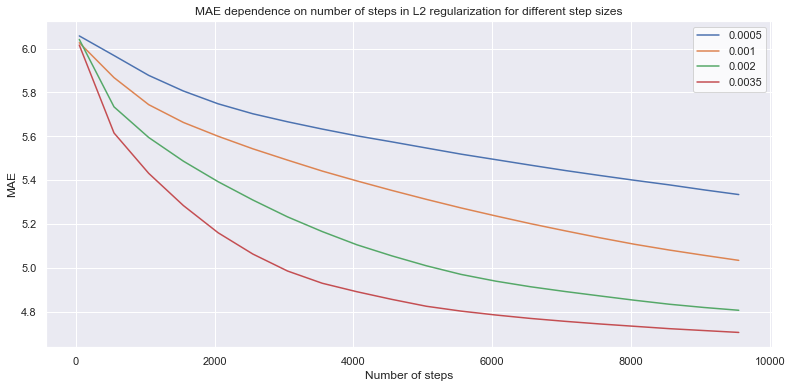

In [22]:
plt.figure(figsize=(13, 6))
plt.plot(steps, mae_values_3, label='0.0005')
plt.plot(steps, mae_values_2, label='0.001')
plt.plot(steps, mae_values, label='0.002')
plt.plot(steps, mae_values_4, label='0.0035')
plt.legend(facecolor='white')
plt.title('MAE dependence on number of steps in L2 regularization for different step sizes')
plt.xlabel('Number of steps')
plt.ylabel('MAE')
plt.show()

Видно, что зависимость выглядит примерно одинаково во всех случаях, и что чем больше итераций, тем лучше. Теперь найдём зависимость MAE от eps:

In [26]:
epsilons = [1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4]
optimal_eps = 0
min_score = 1e8
mae_values = []
for eps in epsilons:
    lr_reg = RegL2(eps=eps, step_size=0.0035)
    cv_results = cross_validate(lr_reg, X_train, y_train, scoring='neg_mean_absolute_error', cv=3, 
                                return_train_score=False)
    score = np.abs((cv_results['test_score'][0] + cv_results['test_score'][1] +
                              cv_results['test_score'][2]) / 3)
    mae_values.append(score)
    if score < min_score: 
        optimal_eps = eps
        min_score = score
print(optimal_eps, min_score)

1e-06 4.699853422591321


In [27]:
print(mae_values) 

[4.700316560382635, 4.699872554195721, 4.700413529240365, 4.700149172921111, 4.699853422591321, 4.7001232680899605, 4.700096531464685]


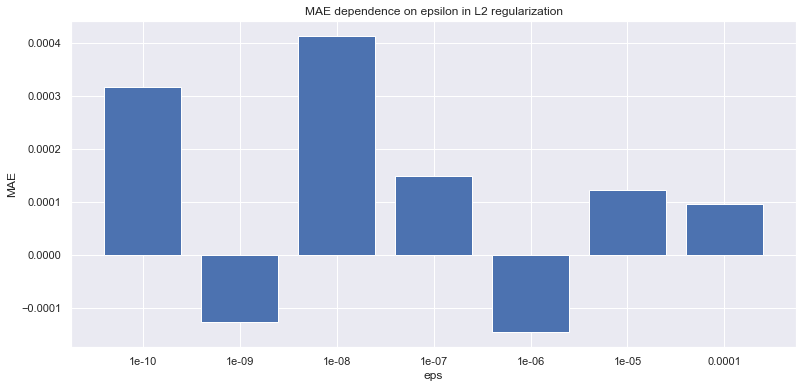

In [29]:
mae_values = np.array(mae_values) - 4.7
plt.figure(figsize=(13, 6))
plt.bar(range(len(epsilons)), mae_values)
plt.xticks(range(len(epsilons)), epsilons)
plt.title('MAE dependence on epsilon in L2 regularization')
plt.xlabel('eps')
plt.ylabel('MAE')
plt.show()

### 6 (Бонус, 0 баллов). 
Вставьте сюда любимую картинку, которая сможет поднять настроение ассистенту и семинаристу

<img src='https://pp.userapi.com/c851536/v851536811/1d18f/qRY2CNLjPYk.jpg' width='450'>